In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg')

In [4]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

In [16]:
result = detect_face(solvay)

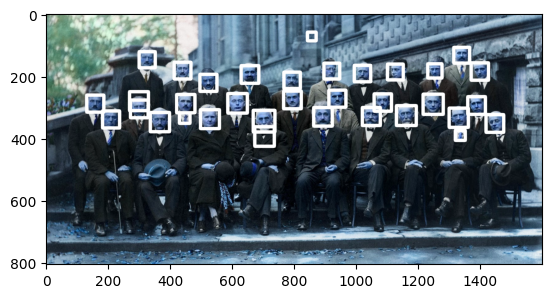

In [17]:
plt.imshow(result,cmap='gray')

# adjust parameter를 넣으면 잘못 검출된 것들은 사라지지만 front face가 아닌 경우도 검출이 안될 수 있다

In [37]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

In [38]:
result = adj_detect_face(solvay)

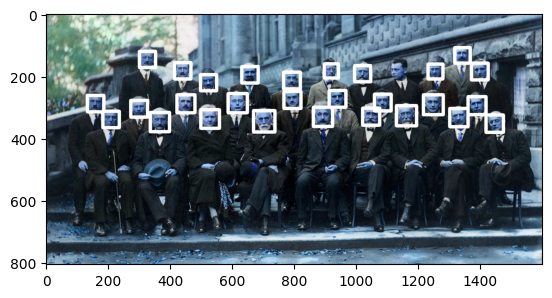

In [39]:
plt.imshow(result,cmap='gray')

In [40]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [48]:
def detect_eyes(img):
    face_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

In [49]:
result = detect_eyes(nadia)

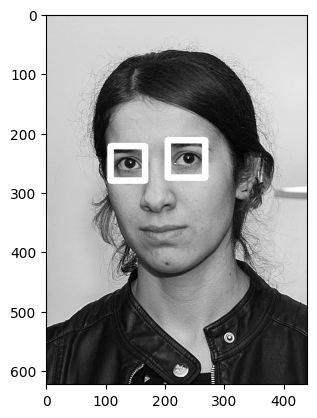

In [50]:
plt.imshow(result,cmap='gray')

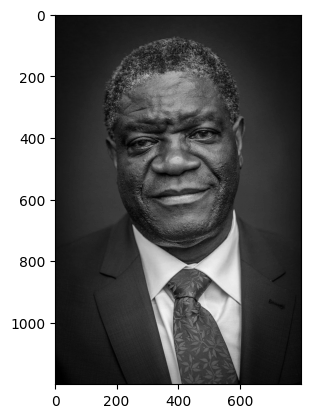

In [51]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('VIDEO fACE DETECT',frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()